In [1]:
import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)

In [2]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session =tf.compat.v1.InteractiveSession(config=config)

In [3]:
# gpu_devices = tf.config.experimental.list_physical_devices("GPU")
# for device in gpu_devices:
#     tf.config.experimental.set_memory_growth(device, True)

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    # Restrict TensorFlow to only allocate 1GB * 2 of memory on the first GPU
    try:
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0],
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024 * 2)])
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Virtual devices must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [5]:
from __future__ import print_function
from matplotlib import pyplot as plt
# get_ipython().magic(u'matplotlib auto')
import tensorflow as tf
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()
# import torch
from tensorflow import keras

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Activation
from tensorflow import reshape
from keras.utils import np_utils
from tensorflow.keras.layers import Conv1D,Conv2D, MaxPooling1D,AveragePooling1D
from tensorflow.keras.layers import SeparableConv1D, Bidirectional
from tensorflow.keras.layers import ZeroPadding2D,ZeroPadding1D, MaxPooling2D, Bidirectional
from tensorflow.keras.regularizers import l2,l1
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import CSVLogger
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from keras import backend as K
from keras.layers import Flatten, Activation, RepeatVector, Permute, Multiply, Lambda, Dense, merge, Add

In [7]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import mean
from numpy import std
# import coremltools
# from torch import nn, optim
# import torch.nn.functional as F
import scipy.io
from scipy import stats
#from IPython.display import display, HTML
from tensorflow.keras import optimizers
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import TimeDistributed
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [8]:
def historyVisualization(history):
    # Plot training & validation loss values
    plt.plot(history.history['mean_squared_error'])
    plt.plot(history.history['mean_absolute_error'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['MSE', 'MAE'], loc='upper left')
    plt.show()
def plotPredict(y_pred, y_test):
    plt.title('Predicted vs Actual')
    plt.xlabel('x')
    plt.ylabel('value')
    plt.plot(y_pred, label='Predicted')
    plt.plot(y_test, label='Actual ')
    plt.legend()
    plt.show()


In [9]:
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(20, 14))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [10]:
mat1=scipy.io.loadmat('/media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/nina_sEMG_preprocess_data.mat')
nina_raw_train=mat1['Training_process_data']
# # nina_raw_valid=mat1['Valid_raw_data']
nina_raw_test=mat1['Testing_process_data'] 
print('raw_Train_data',nina_raw_train)
# # print('raw_valid_data',nina_raw_valid)
print('raw_Test_data',nina_raw_test)

raw_Train_data [[7.19998933e-03 2.42352611e-03 4.92862675e-03 ... 2.41300425e-03
  2.46727202e-03 1.00000000e+00]
 [8.36245258e-03 2.42505276e-03 4.78253686e-03 ... 2.41365181e-03
  2.47075415e-03 1.00000000e+00]
 [9.48596411e-03 2.42667848e-03 4.64077575e-03 ... 2.41454821e-03
  2.47536253e-03 1.00000000e+00]
 ...
 [3.94424454e-03 2.62137279e-03 2.73581110e-03 ... 3.48976948e-03
  6.15271911e-02 5.20000000e+01]
 [3.96512364e-03 2.61904942e-03 2.73113030e-03 ... 3.47546397e-03
  6.08175908e-02 5.20000000e+01]
 [3.98214675e-03 2.61795167e-03 2.72887543e-03 ... 3.46790621e-03
  6.02362927e-02 5.20000000e+01]]
raw_Test_data [[3.17589407e-02 2.47425303e-03 2.43502657e-03 ... 2.43772337e-03
  2.40898095e-03 1.00000000e+00]
 [3.20504199e-02 2.47780922e-03 2.44445360e-03 ... 2.43977223e-03
  2.40927484e-03 1.00000000e+00]
 [3.23410828e-02 2.48228892e-03 2.45355130e-03 ... 2.44207134e-03
  2.40962348e-03 1.00000000e+00]
 ...
 [2.50557773e-03 2.54337291e-03 2.60044457e-03 ... 2.57131761e-03
  1

In [11]:
np.savetxt("/media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/nina_pro_Train.csv", nina_raw_train, delimiter=",")
np.savetxt("/media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/nina_pro_Test.csv", nina_raw_test, delimiter=",")
# # np.savetxt("/content/drive/My Drive/codes/nina_prep_python/rawdata/nina_pro_Valid.csv", nina_raw_valid, delimiter=",")

In [12]:
file_path_Train= "/media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/nina_pro_Train.csv"
file_path_Test= "/media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/nina_pro_Test.csv"
# file_path_Valid= "/content/drive/My Drive/codes/nina_prep_python/rawdata/nina_pro_Valid.csv"
# file_path_Train= "./nina_pro_Train_E123.csv"
# file_path_Test= "./nina_pro_Test_E123.csv"
# Set some standard parameters upfront
pd.options.display.float_format = '{:.1f}'.format
sns.set() # Default seaborn look and feel
#plt.style.use('ggplot')
print('keras version ', keras.__version__)
# Same labels will be reused throughout the program
LABELS=[]
for i in range(1,53,1):
  LABELS.append (i)
print(LABELS)
# LABELS = ['1','2', '3', '4', '5', '6', '7', '8', '9', '10', '11','12','13',\
# '14','15','16','17','18','19','20','21','22','23','24','25','26','27','28',\
# '29','30','31','32','33','34','35','36','37','38','39','40','41','42','43',\
# '44','45','46','47','48','49','50','51','52']
#LABELS = np.asarray(LABELS)

keras version  2.3.0-tf
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]


In [13]:
# The number of steps within one time segment
TIME_PERIODS = 512
# The steps to take from one segment to the next; if this value is equal to
# TIME_PERIODS, then there is no overlap between the segments
STEP_DISTANCE = 512
n_features = 10

In [14]:
def read_data_Train(file_path_Train):
    column_names = ['C1', 'C2','C3','C4','C5','C6','C7','C8','C9','C10','Class_label']
    df_Train = pd.read_csv(file_path_Train,
                     header=None,
                     names=column_names)
    # Last column has a ";" character which must be removed ...
    df_Train['Class_label'].replace(regex=True,
      inplace=True,
      to_replace=r';',
      value=r'')
    # ... and then this column must be transformed to float explicitly
    df_Train['Class_label'] = df_Train['Class_label'].apply(convert_to_float)
    # This is very important otherwise the model will not fit and loss
    # will show up as NAN
    df_Train.dropna(axis=0, how='any', inplace=True)
    return df_Train
def convert_to_float(x):
    try:
        return np.float(x)
    except:
        return np.nan

In [15]:
def show_basic_dataframe_info(dataframe):
    # Shape and how many rows and columns
    print('Number of columns in the dataframe: %i' % (dataframe.shape[1]))
    print('Number of rows in the dataframe: %i\n' % (dataframe.shape[0]))

In [16]:
def read_data_Test(file_path_Test):
    column_names = ['C1', 'C2','C3','C4','C5','C6','C7','C8','C9','C10','Class_label']
    df_Test = pd.read_csv(file_path_Test,
                     header=None,
                     names=column_names)
    # Last column has a ";" character which must be removed ...
    df_Test['Class_label'].replace(regex=True,
      inplace=True,
      to_replace=r';',
      value=r'')
    # ... and then this column must be transformed to float explicitly
    df_Test['Class_label'] = df_Test['Class_label'].apply(convert_to_float)
    # This is very important otherwise the model will not fit and loss
    # will show up as NAN
    df_Test.dropna(axis=0, how='any', inplace=True)
    return df_Test

In [17]:
def convert_to_float(x):
    try:
        return np.float(x)
    except:
        return np.nan

In [18]:
def show_basic_dataframe_info(dataframe):
    # Shape and how many rows and columns
    print('Number of columns in the dataframe: %i' % (dataframe.shape[1]))
    print('Number of rows in the dataframe: %i\n' % (dataframe.shape[0]))

In [19]:
df_Train = read_data_Train('/media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/nina_pro_Train.csv')
# Describe the data
show_basic_dataframe_info(df_Train)
df_Train.head(20)

Number of columns in the dataframe: 11
Number of rows in the dataframe: 5031936



,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,Class_label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


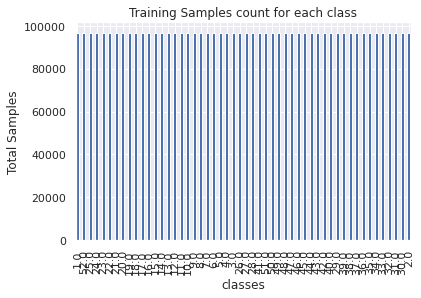

In [20]:
df_Train['Class_label'].value_counts().plot(kind='bar',
                                   title='Training Samples count for each class')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
#plt.rcParams["figure.figsize"] = fig_size
plt.ylabel('Total Samples')
plt.xlabel('classes')
plt.grid(True)
plt.autoscale(axis='x',tight=True)

In [21]:
df_Test = read_data_Test('/media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/nina_pro_Test.csv')
# Describe the data
show_basic_dataframe_info(df_Test)
df_Test.head(20)


Number of columns in the dataframe: 11
Number of rows in the dataframe: 2156544



,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,Class_label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


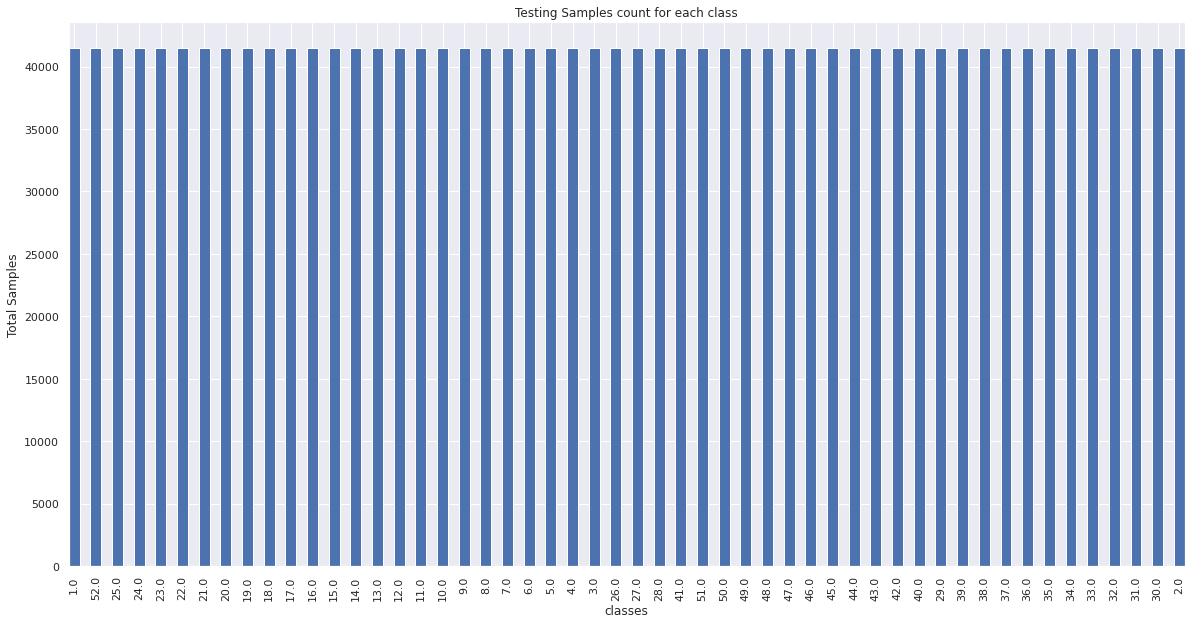

In [22]:
df_Test['Class_label'].value_counts().plot(kind='bar',
                                   title='Testing Samples count for each class')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.ylabel('Total Samples')
plt.xlabel('classes')
plt.grid(True)
plt.autoscale(axis='x',tight=True)

In [23]:
pd.options.display.float_format = "{:,.5f}".format
df_Train.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,Class_label
0,0.00720,0.00242,0.00493,0.00242,0.00245,0.00241,0.00308,0.01634,0.00241,0.00247,1.00000
1,0.00836,0.00243,0.00478,0.00242,0.00245,0.00241,0.00312,0.01699,0.00241,0.00247,1.00000
2,0.00949,0.00243,0.00464,0.00242,0.00246,0.00241,0.00317,0.01762,0.00241,0.00248,1.00000
3,0.01052,0.00243,0.00451,0.00242,0.00246,0.00241,0.00322,0.01822,0.00242,0.00248,1.00000
4,0.01142,0.00243,0.00439,0.00242,0.00246,0.00241,0.00327,0.01877,0.00242,0.00248,1.00000


In [24]:
scaler = preprocessing.StandardScaler().fit(df_Train.iloc[:,0:n_features])

In [25]:
df_Train.iloc[:,0:n_features]=scaler.transform(df_Train.iloc[:,0:n_features])

In [26]:
pd.options.display.float_format = "{:,.5f}".format
df_Train.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,Class_label
0,-0.67229,-0.63485,-0.51161,-0.43213,-0.36882,-0.45281,-0.75398,-0.90170,-0.51352,-0.77192,1.00000
1,-0.66990,-0.63485,-0.51198,-0.43213,-0.36879,-0.45280,-0.75392,-0.90043,-0.51352,-0.77191,1.00000
2,-0.66759,-0.63485,-0.51234,-0.43212,-0.36875,-0.45280,-0.75384,-0.89918,-0.51352,-0.77190,1.00000
3,-0.66546,-0.63484,-0.51268,-0.43212,-0.36871,-0.45280,-0.75376,-0.89799,-0.51352,-0.77189,1.00000
4,-0.66362,-0.63483,-0.51299,-0.43211,-0.36867,-0.45279,-0.75369,-0.89691,-0.51351,-0.77188,1.00000


In [27]:
pd.options.display.float_format = "{:,.5f}".format
df_Test.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,Class_label
0,0.03176,0.00247,0.00244,0.00240,0.00244,0.00240,0.00258,0.03562,0.00244,0.00241,1.00000
1,0.03205,0.00248,0.00244,0.00240,0.00245,0.00240,0.00258,0.03567,0.00244,0.00241,1.00000
2,0.03234,0.00248,0.00245,0.00240,0.00246,0.00240,0.00259,0.03569,0.00244,0.00241,1.00000
3,0.03261,0.00249,0.00246,0.00240,0.00246,0.00240,0.00260,0.03570,0.00244,0.00241,1.00000
4,0.03285,0.00249,0.00246,0.00240,0.00246,0.00240,0.00261,0.03566,0.00245,0.00241,1.00000


In [28]:
df_Test.iloc[:,0:n_features]=scaler.transform(df_Test.iloc[:,0:n_features])

In [29]:
pd.options.display.float_format = "{:,.5f}".format
df_Test.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,Class_label
0,-0.62181,-0.63470,-0.51795,-0.43219,-0.36893,-0.45286,-0.75480,-0.86372,-0.51346,-0.77206,1.00000
1,-0.62121,-0.63469,-0.51792,-0.43219,-0.36881,-0.45286,-0.75479,-0.86364,-0.51345,-0.77206,1.00000
2,-0.62061,-0.63468,-0.51790,-0.43219,-0.36872,-0.45286,-0.75477,-0.86358,-0.51345,-0.77206,1.00000
3,-0.62006,-0.63467,-0.51789,-0.43219,-0.36867,-0.45286,-0.75476,-0.86357,-0.51344,-0.77205,1.00000
4,-0.61957,-0.63465,-0.51789,-0.43219,-0.36865,-0.45286,-0.75474,-0.86364,-0.51344,-0.77205,1.00000


In [30]:
LABEL = 'ActivityEncoded'
# Transform the labels from String to Integer via LabelEncoder
le = preprocessing.LabelEncoder()
# Add a new column to the existing DataFrame with the encoded values
df_Train[LABEL] = le.fit_transform(df_Train['Class_label'].values.ravel())
# df_Valid[LABEL] = le.fit_transform(df_Valid['Class_label'].values.ravel())
df_Test[LABEL] = le.fit_transform(df_Test['Class_label'].values.ravel())
print('df_train_size',df_Train)
# print('df_valid_size',df_Valid)
print('df_test_size',df_Test)

df_train_size               C1       C2       C3       C4       C5       C6       C7  \
0       -0.67229 -0.63485 -0.51161 -0.43213 -0.36882 -0.45281 -0.75398   
1       -0.66990 -0.63485 -0.51198 -0.43213 -0.36879 -0.45280 -0.75392   
2       -0.66759 -0.63485 -0.51234 -0.43212 -0.36875 -0.45280 -0.75384   
3       -0.66546 -0.63484 -0.51268 -0.43212 -0.36871 -0.45280 -0.75376   
4       -0.66362 -0.63483 -0.51299 -0.43211 -0.36867 -0.45279 -0.75369   
...          ...      ...      ...      ...      ...      ...      ...   
5031931 -0.67906 -0.63424 -0.51714 -0.43021 -0.35403  0.13654  0.12757   
5031932 -0.67903 -0.63426 -0.51716 -0.43025 -0.35431  0.13208  0.11671   
5031933 -0.67898 -0.63427 -0.51718 -0.43028 -0.35465  0.12755  0.10702   
5031934 -0.67894 -0.63427 -0.51719 -0.43031 -0.35495  0.12339  0.09885   
5031935 -0.67890 -0.63428 -0.51720 -0.43032 -0.35514  0.11980  0.09225   

              C8       C9      C10  Class_label  ActivityEncoded  
0       -0.90170 -0.51352 -0.7

In [31]:
def create_segments_and_labels(df, time_steps,step, label_name):
    # x, y, z acceleration as features
    # N_FEATURES = 10
    # Number of steps to advance in each iteration (for me, it should always
    # be equal to the time_steps in order to have no overlap between segments)
    # step = time_steps
	#step = 200
    segments = []
    labels = []
    for i in range(0, len(df) - time_steps, step):
        c1s = df['C1'].values[i: i + time_steps]
        c2s = df['C2'].values[i: i + time_steps]
        c3s = df['C3'].values[i: i + time_steps]
        c4s = df['C4'].values[i: i + time_steps]
        c5s = df['C5'].values[i: i + time_steps]
        c6s = df['C6'].values[i: i + time_steps]
        c7s = df['C7'].values[i: i + time_steps]
        c8s = df['C8'].values[i: i + time_steps]
        c9s = df['C9'].values[i: i + time_steps]
        c10s = df['C10'].values[i: i + time_steps]
        # Retrieve the most often used label in this segment
      #  label_name - label_name.astype(int)
        label = stats.mode(df[label_name][i: i + time_steps])[0][0]
        segments.append([c1s, c2s, c3s,c4s, c5s, c6s,c7s, c8s, c9s,c10s])
        # segments = pd.concat([c1s, c2s, c3s,c4s, c5s, c6s,c7s, c8s, c9s, c10s], axis=1)
        labels.append(label)
    # Bring the segments into a better shape
    reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, n_features)
    labels = np.asarray(labels)
    return reshaped_segments, labels

In [32]:
x_train, y_train = create_segments_and_labels(df_Train,TIME_PERIODS,STEP_DISTANCE,LABEL)
print('x_train shape: ', x_train.shape)
# print(x_train)
print(x_train.shape[0], 'training samples')
print('y_train shape: ', y_train.shape)
# Set input & output dimensions
num_time_periods, num_sensors = x_train.shape[1], x_train.shape[2]
print(num_time_periods)
print(num_sensors)
num_classes = le.classes_.size
print(list(le.classes_))
# input_shape = (num_time_periods,num_sensors)
# print(input_shape)
input_shape = (num_time_periods,num_sensors)
#x_train = x_train.reshape(x_train.shape[0], input_shape)
print('x_train shape:', x_train[0].shape)
print('input_shape:', input_shape)
x_train = x_train.astype('float32')
# x_train = [torch.tensor(arr, dtype=torch.float32) for arr in x_train]
# y_train = y_train.astype('float32')
# print(y_train)
y_train_hot = np_utils.to_categorical(y_train, num_classes)
print(y_train_hot)
# y_train_hot= [torch.tensor(arr, dtype=torch.uint8) for arr in y_train_hot]
print('New y_train shape: ', y_train_hot.shape)

x_train shape:  (9827, 512, 10)
9827 training samples
y_train shape:  (9827,)
512
10
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0]
x_train shape: (512, 10)
input_shape: (512, 10)
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
New y_train shape:  (9827, 52)


In [33]:
x_test, y_test = create_segments_and_labels(df_Test,
                                            TIME_PERIODS,
                                            STEP_DISTANCE,
                                            LABEL)
print('x_test shape: ', x_test.shape)
# print(x_train)
print(x_test.shape[0], 'testing samples')
print('y_test shape: ', y_test.shape)
# Set input_shape / reshape for Keras
#x_test = x_test.reshape(x_test.shape[0], input_shape)
x_test = x_test.astype('float32')
y_test = y_test.astype('float32')
y_test_hot = np_utils.to_categorical(y_test, num_classes)

x_test shape:  (4211, 512, 10)
4211 testing samples
y_test shape:  (4211,)


In [50]:
# n_steps, n_length = 20, 25
# n_steps, n_length= 10, 50
# n_steps, n_length= 16, 32
n_steps, n_length = 2, 256
n_depth=10
x_train = x_train.reshape(x_train.shape[0], n_steps, n_length,n_depth)
print('x_train shape: ', x_train.shape)
# x_valid = x_valid.reshape(x_valid.shape[0], n_steps, n_length, n_depth)
# print('x_valid shape: ', x_valid.shape)
x_test = x_test.reshape(x_test.shape[0], n_steps, n_length,n_depth)
print('x_test shape: ', x_test.shape)
n_outputs = y_train_hot.shape[1]
print('n_outputs',n_outputs)

x_train shape:  (9827, 2, 256, 10)
x_test shape:  (4211, 2, 256, 10)
n_outputs 52


In [51]:
verbose, epochs, batch_size = 0, 500, 4

In [66]:
def generate_model():
  inputs = keras.Input(shape=(n_steps,n_length,n_depth))
  x = TimeDistributed(Conv1D(128, 9,kernel_initializer="he_normal", kernel_regularizer=l1(1e-04), padding='same'))(inputs)
  x = TimeDistributed(MaxPooling1D(pool_size=8,strides=2))(x)
  x = TimeDistributed(Activation('tanh'))(x)
  x = TimeDistributed(Conv1D(filters=128, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04)))(x)
  x = TimeDistributed(Activation('tanh'))(x)
  x = TimeDistributed(Dropout(0.2093))(x)
  x = TimeDistributed(Conv1D(filters=128, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04)))(x)
  x = TimeDistributed(Activation('tanh'))(x)
  x = TimeDistributed(Dropout(0.2093))(x)
  x = TimeDistributed(Conv1D(filters=128, kernel_size=3,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04)))(x)
  x = TimeDistributed(Activation('tanh'))(x)
  x = TimeDistributed(Dropout(0.2093))(x)
  x = TimeDistributed(Activation('relu'))(x)
  x = TimeDistributed(Flatten())(x)
  x = Bidirectional(LSTM(200,return_sequences=True))(x)
#   x = Dropout(0.5)(x)
#   x = Bidirectional(LSTM(200,return_sequences=True))(x)
#   x = Dropout(0.5)(x)
#   x = BatchNormalization(epsilon=1e-05, momentum=0.9, weights=None)(x)
#   x = Bidirectional(LSTM(200))(x)
#   x = Dropout(0.5)(x)
  e = Dense(1, activation='tanh')(x)
# Now do all the softmax business taking the above o/p
  e = Flatten()(e)
  a = Activation('softmax')(e)
  temp = RepeatVector(400)(a)
  temp = Permute([2, 1])(temp)
# multiply weight with lstm layer o/p
  output = merge.Add()([x, temp])
# Get the attention adjusted output state
  output = Lambda(lambda values: K.sum(values, axis=1))(output)
#   a, attn_adjusted_op = peel_the_layer()(x)
  y = Dense(512, activation='tanh')(output)
  y = BatchNormalization(epsilon=1e-05, momentum=0.9, weights=None)(y)
  outputs = Dense(n_outputs, activation='softmax')(y)
  CNN_LSTM_model = keras.Model(inputs, outputs)
  CNN_LSTM_model.summary()
  return CNN_LSTM_model

In [67]:
# 23 model summary 
if __name__ == "__main__":
    model = generate_model()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2, 256, 10)] 0                                            
__________________________________________________________________________________________________
time_distributed_28 (TimeDistri (None, 2, 256, 128)  11648       input_3[0][0]                    
__________________________________________________________________________________________________
time_distributed_29 (TimeDistri (None, 2, 125, 128)  0           time_distributed_28[0][0]        
__________________________________________________________________________________________________
time_distributed_30 (TimeDistri (None, 2, 125, 128)  0           time_distributed_29[0][0]        
____________________________________________________________________________________________

In [68]:
adam=optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
checkpoint_filepath = '/media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/LSTM512X10/checkpoint.hdf5'
# model.load_weights(checkpoint_filepath) 
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath,verbose=1, monitor='val_accuracy',save_weights_only=True,save_best_only=True)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=30, verbose=0, mode='auto', baseline=None, restore_best_weights=True)
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
# model.build(inputs)
print(model.summary())

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 2, 256, 10)] 0                                            
__________________________________________________________________________________________________
time_distributed_28 (TimeDistri (None, 2, 256, 128)  11648       input_3[0][0]                    
__________________________________________________________________________________________________
time_distributed_29 (TimeDistri (None, 2, 125, 128)  0           time_distributed_28[0][0]        
__________________________________________________________________________________________________
time_distributed_30 (TimeDistri (None, 2, 125, 128)  0           time_distributed_29[0][0]        
____________________________________________________________________________________________

In [85]:
!pip3 install pydot
!pip3 install pydotplus
!pip3 install graphviz

     |████████████████████████████████| 278 kB 51 kB/s eta 0:00:015
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=8037536a6dcee568ae20ea3317549775e0c5f03031c5bff12db967a7f084405a
  Stored in directory: /home/naveen/.cache/pip/wheels/fe/cd/78/a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36
Successfully built pydotplus


In [86]:
tf.keras.utils.plot_model(model, to_file='/media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/LSTM512X10/Model1.png',show_shapes=True,show_layer_names=True,dpi=96)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [70]:
csv_logger = CSVLogger('/media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/LSTM512X10/LSTM_nina_20X100.csv', append=True, separator=';')
history = model.fit(x_train, y_train_hot, epochs=epochs, batch_size=batch_size, callbacks=[csv_logger,checkpoint_callback,early],validation_data=(x_test, y_test_hot), verbose=1)

Epoch 1/500
2457/2457 [==============================] - ETA: 0s - loss: 4.7629 - accuracy: 0.1216
Epoch 00001: val_accuracy improved from -inf to 0.33151, saving model to /media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/LSTM512X10/checkpoint.hdf5
2457/2457 [==============================] - 47s 19ms/step - loss: 4.7629 - accuracy: 0.1216 - val_loss: 3.7003 - val_accuracy: 0.3315
Epoch 2/500
2454/2457 [============================>.] - ETA: 0s - loss: 3.9828 - accuracy: 0.2601
Epoch 00002: val_accuracy improved from 0.33151 to 0.45096, saving model to /media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/LSTM512X10/checkpoint.hdf5
2457/2457 [==============================] - 40s 16ms/step - loss: 3.9828 - accuracy: 0.2601 - val_loss: 3.1283 - val_accuracy: 0.4510
Epoch 3/500
2454/2457 [============================>.] - ETA: 0s - loss: 3.5345 - accuracy: 0.3608
Epoch 00003: val_accuracy improved from 0.45096 to 0.53242, saving model to /media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/LSTM512X10/ch

Epoch 24/500
2455/2457 [============================>.] - ETA: 0s - loss: 0.8214 - accuracy: 0.9392
Epoch 00024: val_accuracy improved from 0.85752 to 0.86037, saving model to /media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/LSTM512X10/checkpoint.hdf5
2457/2457 [==============================] - 46s 19ms/step - loss: 0.8213 - accuracy: 0.9392 - val_loss: 1.1884 - val_accuracy: 0.8604
Epoch 25/500
2455/2457 [============================>.] - ETA: 0s - loss: 0.7832 - accuracy: 0.9414
Epoch 00025: val_accuracy did not improve from 0.86037
2457/2457 [==============================] - 44s 18ms/step - loss: 0.7830 - accuracy: 0.9415 - val_loss: 1.1952 - val_accuracy: 0.8594
Epoch 26/500
2457/2457 [==============================] - ETA: 0s - loss: 0.7572 - accuracy: 0.9439
Epoch 00026: val_accuracy did not improve from 0.86037
2457/2457 [==============================] - 43s 18ms/step - loss: 0.7572 - accuracy: 0.9439 - val_loss: 1.1762 - val_accuracy: 0.8556
Epoch 27/500
2457/2457 [===========

Epoch 50/500
2455/2457 [============================>.] - ETA: 0s - loss: 0.3729 - accuracy: 0.9727
Epoch 00050: val_accuracy did not improve from 0.87414
2457/2457 [==============================] - 43s 17ms/step - loss: 0.3728 - accuracy: 0.9727 - val_loss: 0.9219 - val_accuracy: 0.8734
Epoch 51/500
2454/2457 [============================>.] - ETA: 0s - loss: 0.3748 - accuracy: 0.9700
Epoch 00051: val_accuracy did not improve from 0.87414
2457/2457 [==============================] - 42s 17ms/step - loss: 0.3747 - accuracy: 0.9701 - val_loss: 0.9305 - val_accuracy: 0.8734
Epoch 52/500
2454/2457 [============================>.] - ETA: 0s - loss: 0.3660 - accuracy: 0.9713
Epoch 00052: val_accuracy improved from 0.87414 to 0.88031, saving model to /media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/LSTM512X10/checkpoint.hdf5
2457/2457 [==============================] - 42s 17ms/step - loss: 0.3659 - accuracy: 0.9713 - val_loss: 0.8758 - val_accuracy: 0.8803
Epoch 53/500
2457/2457 [===========

Epoch 78/500
2455/2457 [============================>.] - ETA: 0s - loss: 0.2450 - accuracy: 0.9810
Epoch 00078: val_accuracy did not improve from 0.88031
2457/2457 [==============================] - 43s 18ms/step - loss: 0.2450 - accuracy: 0.9810 - val_loss: 0.8603 - val_accuracy: 0.8775
Epoch 79/500
2455/2457 [============================>.] - ETA: 0s - loss: 0.2556 - accuracy: 0.9766
Epoch 00079: val_accuracy improved from 0.88031 to 0.88126, saving model to /media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/LSTM512X10/checkpoint.hdf5
2457/2457 [==============================] - 42s 17ms/step - loss: 0.2556 - accuracy: 0.9766 - val_loss: 0.8400 - val_accuracy: 0.8813
Epoch 80/500
2455/2457 [============================>.] - ETA: 0s - loss: 0.2321 - accuracy: 0.9831
Epoch 00080: val_accuracy did not improve from 0.88126
2457/2457 [==============================] - 42s 17ms/step - loss: 0.2320 - accuracy: 0.9831 - val_loss: 0.8543 - val_accuracy: 0.8739
Epoch 81/500
2455/2457 [===========

Epoch 106/500
2456/2457 [============================>.] - ETA: 0s - loss: 0.1835 - accuracy: 0.9847
Epoch 00106: val_accuracy did not improve from 0.88435
2457/2457 [==============================] - 41s 17ms/step - loss: 0.1835 - accuracy: 0.9847 - val_loss: 0.8181 - val_accuracy: 0.8794
Epoch 107/500
2455/2457 [============================>.] - ETA: 0s - loss: 0.1878 - accuracy: 0.9832
Epoch 00107: val_accuracy did not improve from 0.88435
2457/2457 [==============================] - 40s 16ms/step - loss: 0.1878 - accuracy: 0.9832 - val_loss: 0.8289 - val_accuracy: 0.8810
Epoch 108/500
2453/2457 [============================>.] - ETA: 0s - loss: 0.1946 - accuracy: 0.9811
Epoch 00108: val_accuracy did not improve from 0.88435
2457/2457 [==============================] - 40s 16ms/step - loss: 0.1945 - accuracy: 0.9812 - val_loss: 0.8197 - val_accuracy: 0.8765
Epoch 109/500
2454/2457 [============================>.] - ETA: 0s - loss: 0.1801 - accuracy: 0.9845
Epoch 00109: val_accuracy 

Epoch 134/500
2455/2457 [============================>.] - ETA: 0s - loss: 0.1634 - accuracy: 0.9845
Epoch 00134: val_accuracy did not improve from 0.88696
2457/2457 [==============================] - 40s 16ms/step - loss: 0.1634 - accuracy: 0.9845 - val_loss: 0.8802 - val_accuracy: 0.8739
Epoch 135/500
2457/2457 [==============================] - ETA: 0s - loss: 0.1542 - accuracy: 0.9866
Epoch 00135: val_accuracy did not improve from 0.88696
2457/2457 [==============================] - 40s 16ms/step - loss: 0.1542 - accuracy: 0.9866 - val_loss: 0.8531 - val_accuracy: 0.8706
Epoch 136/500
2457/2457 [==============================] - ETA: 0s - loss: 0.1614 - accuracy: 0.9845
Epoch 00136: val_accuracy did not improve from 0.88696
2457/2457 [==============================] - 40s 16ms/step - loss: 0.1614 - accuracy: 0.9845 - val_loss: 0.8433 - val_accuracy: 0.8741
Epoch 137/500
2454/2457 [============================>.] - ETA: 0s - loss: 0.1542 - accuracy: 0.9867
Epoch 00137: val_accuracy 

In [58]:
best_index = history.history['val_accuracy'].index(max(history.history['val_accuracy']))
print('epoch_number',best_index+1)
print('train accuracy and validation accuracy', history.history['accuracy'][best_index], history.history['val_accuracy'][best_index])

epoch_number 127
train accuracy and validation accuracy 0.9839218258857727 0.8853003978729248


In [59]:
model.save('/media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/LSTM512X10/CNN_LSTM_nina_5X97')

INFO:tensorflow:Assets written to: /media/naveen/71A3-5054/sEMG_codes/ninapro_DB1/LSTM512X10/CNN_LSTM_nina_5X97/assets


history loss
history accuracy
history val_loss
history val_accuracy


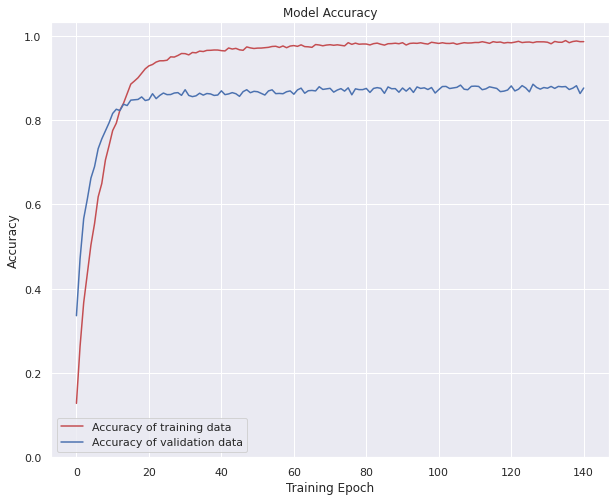

In [60]:
for i in history.history:
    print("history",i)
plt.figure(figsize=(10, 8))
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

history loss
history accuracy
history val_loss
history val_accuracy


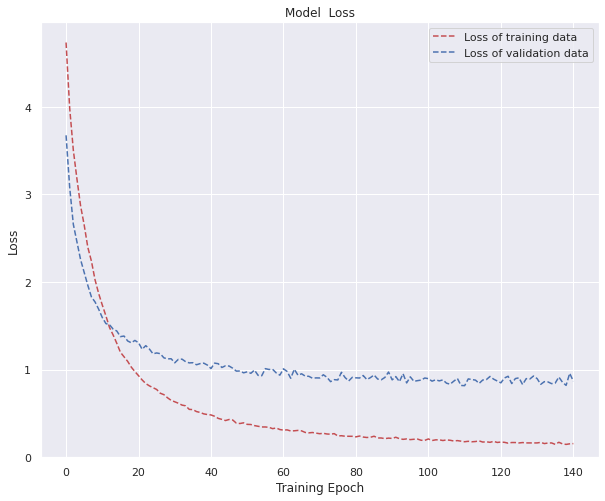

In [61]:
for i in history.history:
    print("history",i)
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model  Loss')
plt.ylabel('Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

In [62]:
model.load_weights(checkpoint_filepath) 
_, testaccuracy = model.evaluate(x_test, y_test_hot, batch_size=batch_size, verbose=1)
print('test_accuracy',testaccuracy)

1053/1053 [==============================] - 9s 9ms/step - loss: 0.8304 - accuracy: 0.8853
test_accuracy 0.8853003978729248


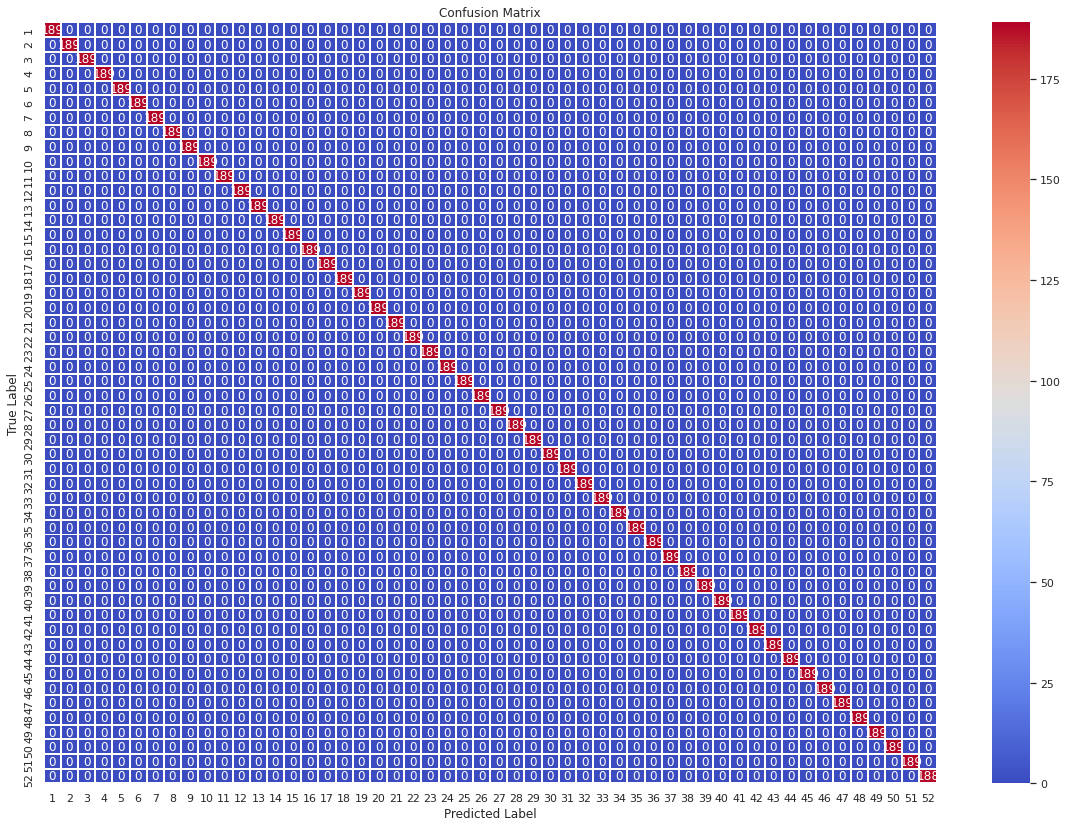

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       189
           1       1.00      1.00      1.00       189
           2       1.00      1.00      1.00       189
           3       1.00      1.00      1.00       189
           4       1.00      1.00      1.00       189
           5       1.00      1.00      1.00       189
           6       1.00      1.00      1.00       189
           7       1.00      1.00      1.00       189
           8       1.00      1.00      1.00       189
           9       1.00      1.00      1.00       189
          10       1.00      1.00      1.00       189
          11       1.00      1.00      1.00       189
          12       1.00      1.00      1.00       189
          13       1.00      1.00      1.00       189
          14       1.00      1.00      1.00       189
          15       1.00      1.00      1.00       189
          16       1.00      1.00      1.00       189
          17       1.00    

In [63]:
y_pred_train = model.predict(x_train)
# Take the class with the highest probability from the train predictions
max_y_pred_train = np.argmax(y_pred_train, axis=1)
#max_y_train = np.argmax(y_train, axis=1)
show_confusion_matrix(y_train, max_y_pred_train)
print(classification_report(y_train, max_y_pred_train))

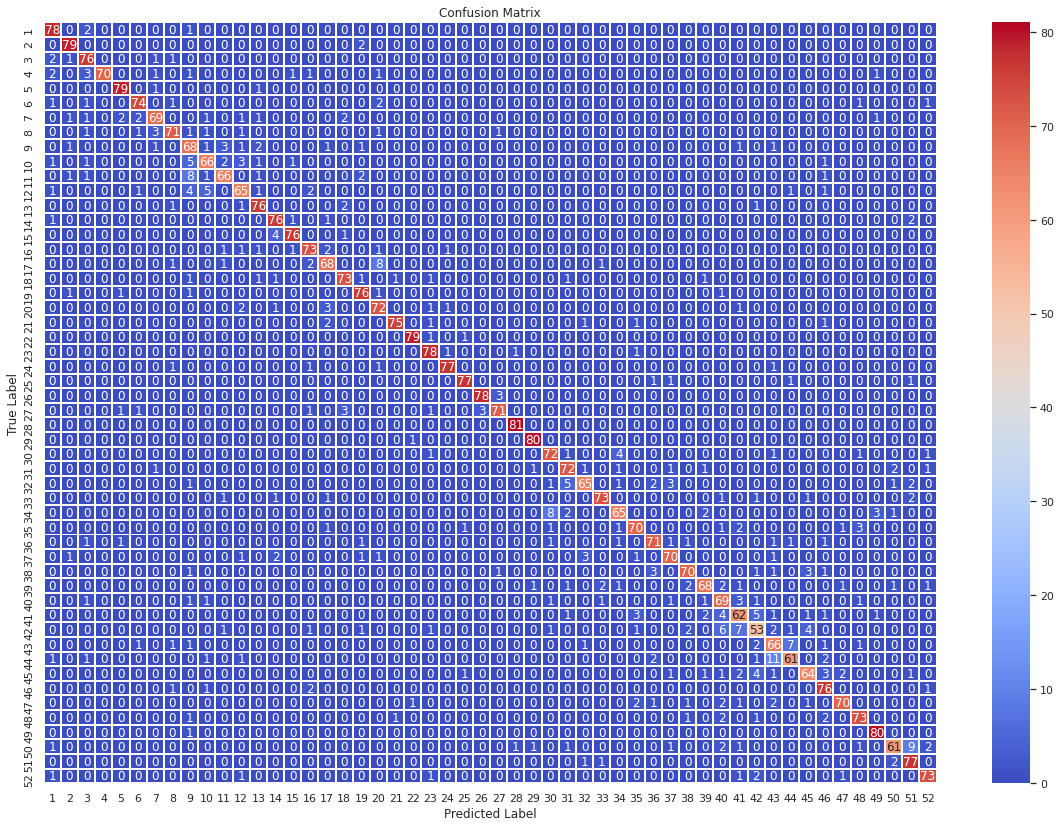

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        81
           1       0.93      0.98      0.95        81
           2       0.85      0.94      0.89        81
           3       1.00      0.86      0.93        81
           4       0.94      0.98      0.96        81
           5       0.93      0.91      0.92        81
           6       0.90      0.85      0.87        81
           7       0.91      0.88      0.89        81
           8       0.71      0.84      0.77        81
           9       0.85      0.81      0.83        81
          10       0.88      0.81      0.85        81
          11       0.83      0.80      0.82        81
          12       0.89      0.94      0.92        81
          13       0.89      0.94      0.92        81
          14       0.95      0.94      0.94        81
          15       0.88      0.90      0.89        81
          16       0.86      0.84      0.85        81
          17       0.90    

In [64]:
y_pred_test = model.predict(x_test)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(y_test_hot, axis=1)
show_confusion_matrix(max_y_test, max_y_pred_test)

print(classification_report(max_y_test, max_y_pred_test))